/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



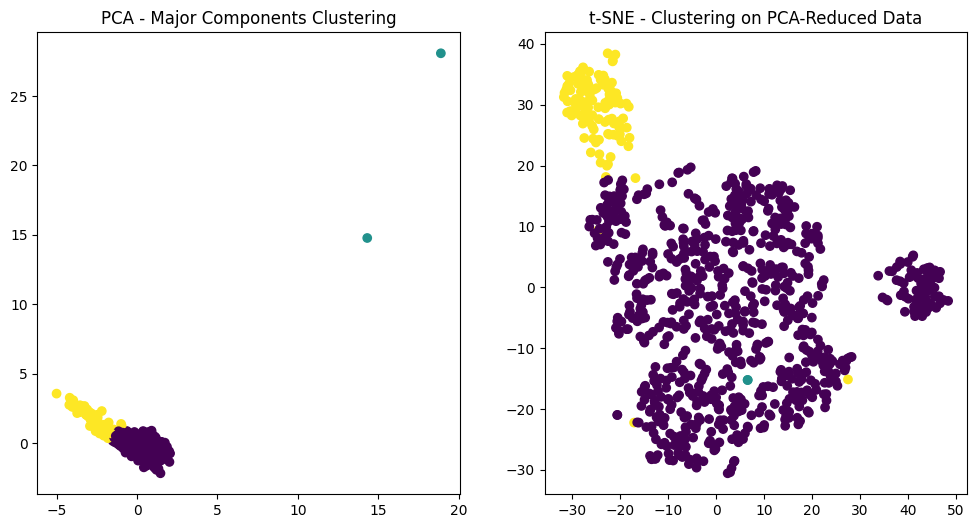

Top 6 nutrients based on overall PCA importance:
P
pH
EC
Mn
N
Cu


In [3]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset
url = 'https://raw.githubusercontent.com/Dhanush-Garrepalli/AgriAssist/main/dataset_soil_nutrients.csv'
df = pd.read_csv(url)

# Prepare the data with the correct nutrient columns
X = df[['N', 'P', 'K', 'pH', 'Zn', 'Fe', 'EC', 'OC', 'S', 'Cu', 'Mn', 'B']]
#Target Variable
y = df['Output']

# Splitting the data in the ratio 0f 80-20. 80% for training and 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to find 6 major components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering on PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df['cluster'] = clusters

# t-SNE for Visualization on PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('PCA - Major Components Clustering')
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis')
plt.title('t-SNE - Clustering on PCA-Reduced Data')
plt.show()

total_importance = np.abs(pca.components_).sum(axis=0)
sorted_indices = np.argsort(total_importance)[::-1]
top_features = X.columns[sorted_indices][:6]

print("Top 6 nutrients based on overall PCA importance:")
for feature in top_features:
    print(feature)


In [4]:
import plotly.express as px

## t-SNE with 3 principal component and 3d Visualization
tsne = TSNE(n_components=3, random_state=42)
projections = tsne.fit_transform(X_pca)


fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df['cluster']
)
fig.update_traces(marker_size=5)
fig.show()

In [5]:
## Using IsoMap for (Isometric Mapping) for understanding and visualizing similarities between data points
from sklearn import manifold

isomap_proj_3d = manifold.Isomap(n_components=3).fit_transform(X_pca)

fig_3d = px.scatter_3d(
    isomap_proj_3d, x=0, y=1, z=2,
    color=df['cluster']
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()